# Assignment 2 : IBM-Project-42267-1660657820

## Import

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

## Loading the dataset

In [3]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


# 1. UNIVARIATE ANALYSIS

## Histogram

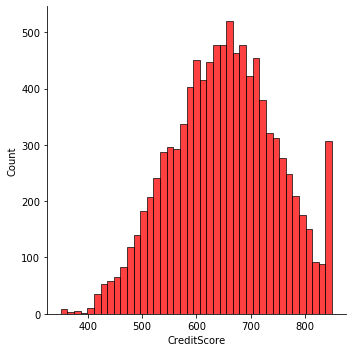

In [5]:
sns.displot(df["CreditScore"], color='red')

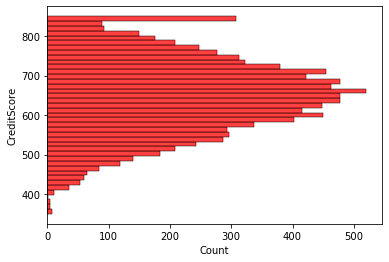

In [6]:
sns.histplot(y="CreditScore",data=df,color='red') 

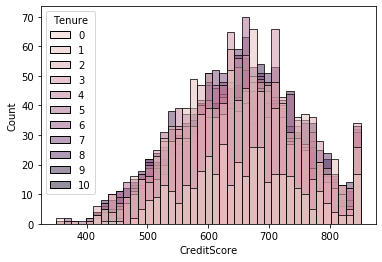

In [33]:
sns.histplot(x='CreditScore',data=df,hue=df['Tenure']) 

## Distplot

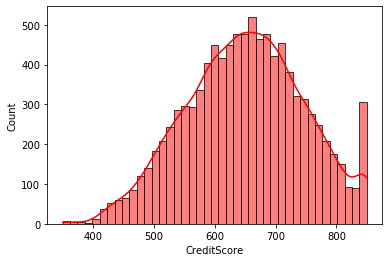

In [34]:
sns.histplot(df["CreditScore"],color='red',kde=True) 

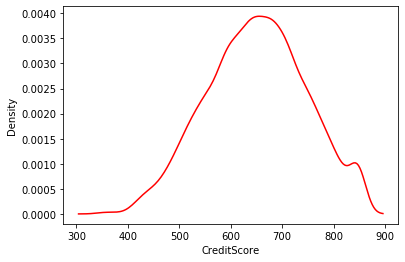

In [30]:
sns.kdeplot(df["CreditScore"], color='red')

## Boxplot

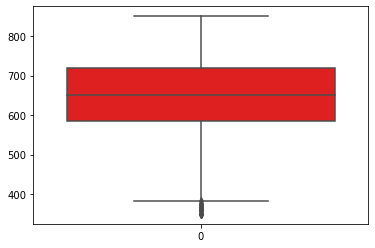

In [15]:
sns.boxplot(df["CreditScore"],color='red') 

## Countplot

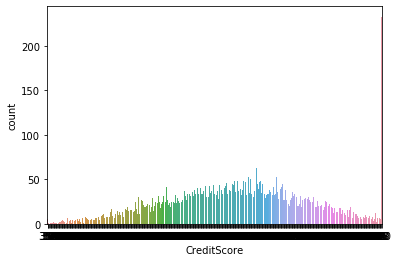

In [19]:
sns.countplot(x=df['CreditScore'])

# 2. BIVARIATE ANALYSIS

## Barplot

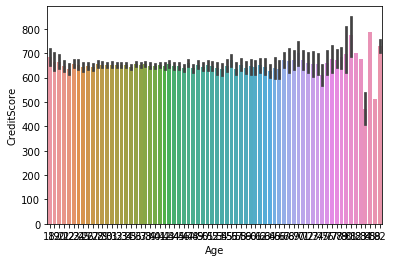

In [46]:
sns.barplot(y=df["CreditScore"],x=df["Age"])

## Linearplot

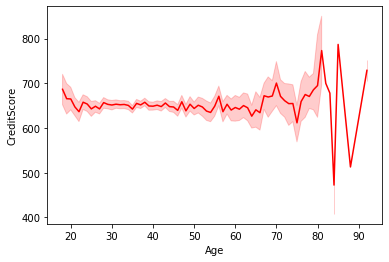

In [45]:
sns.lineplot(x=df["Age"],y=df["CreditScore"], color='red')

## Scatterplot

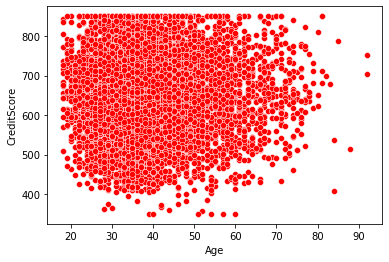

In [49]:
sns.scatterplot(x=df.Age,y=df.CreditScore,color='red')

## Pointplot

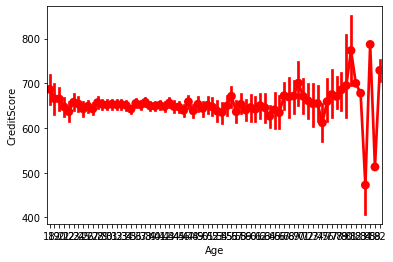

In [50]:
sns.pointplot(x='Age',y='CreditScore',data=df,color='red')

## Regplot

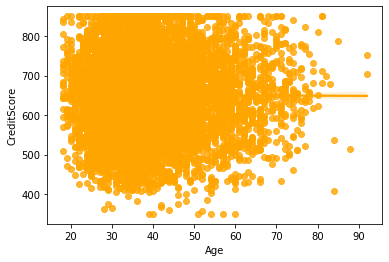

In [54]:
sns.regplot(x=df['Age'],y=df['CreditScore'],color='orange') 

# 3. MULTI - VARIATE ANALYSIS

## Pairplot

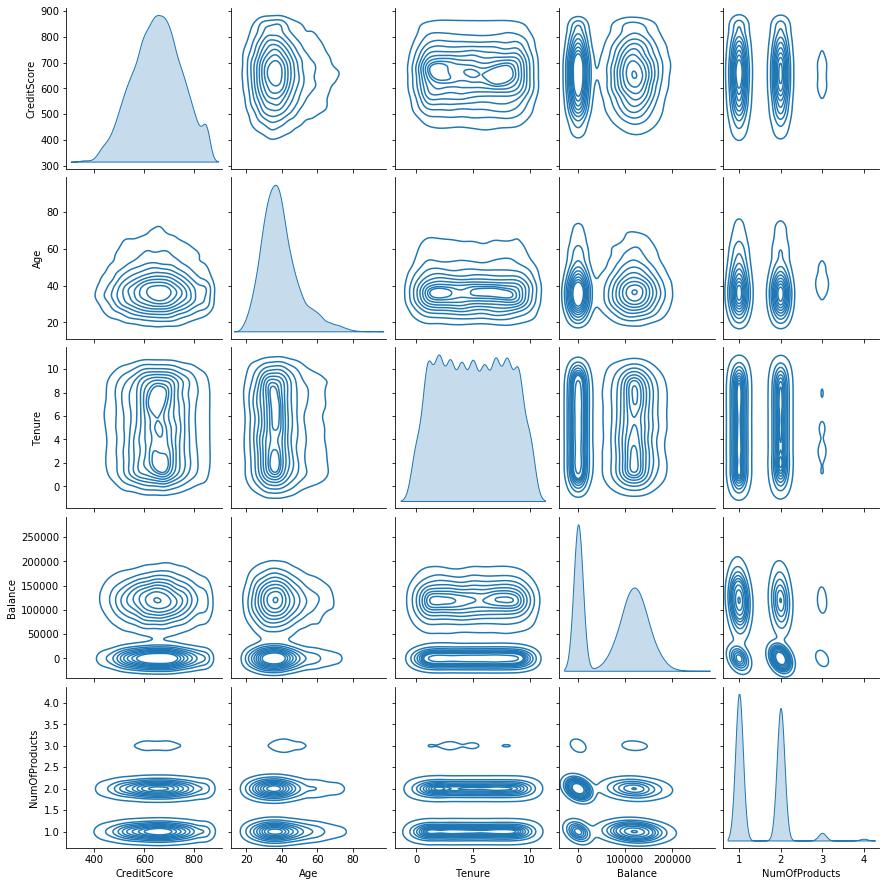

In [55]:
sns.pairplot(data=df[["CreditScore","Age","Tenure","Balance","NumOfProducts"]],kind="kde")

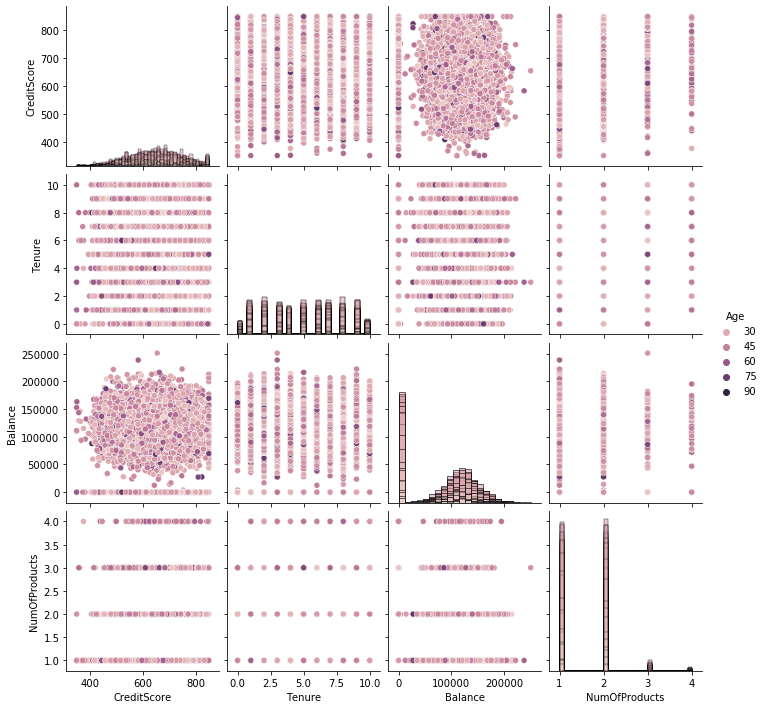

In [56]:
sns.pairplot(data=df[["CreditScore","Age","Tenure","Balance","NumOfProducts"]], hue="Age", diag_kind="hist")

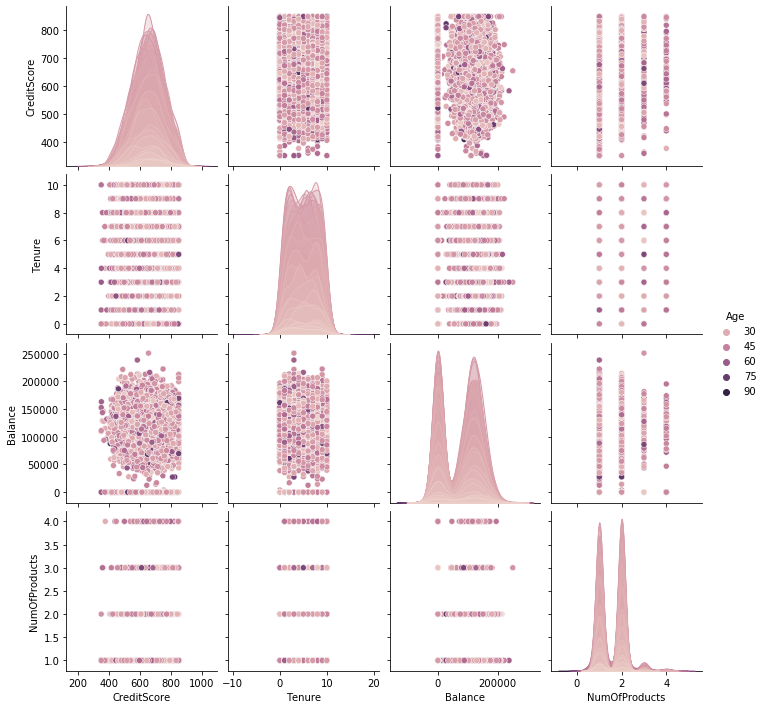

In [57]:
sns.pairplot(data=df[["CreditScore","Age","Tenure","Balance","NumOfProducts"]], hue="Age")

# 4. Descriptive Statistics

In [58]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 5. Handle the Missing values

In [125]:
data=pd.DataFrame({"A":[1,2,np.nan],"B":[1,np.nan,np.nan],"C":[1,2,4]})
data

,A,B,C
0,1.0,1.0,1
1,2.0,NaN,2
2,NaN,NaN,4


In [81]:
data.isnull().any()

a     True
b     True
c    False
dtype: bool

In [82]:
data.isnull().sum()

a    1
b    2
c    0
dtype: int64

In [83]:
data.fillna(value=0)

,a,b,c
0,1.0,1.0,1
1,2.0,0.0,2
2,0.0,0.0,4


In [126]:
print(data["A"].mean())
print(data["A"].median())

1.5
1.5


# 6. Find the outliers and replace the outliers

In [86]:
outlierss=df.quantile(q=(0.25,0.75))
outlierss

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


In [91]:
A=outlierss.loc[0.75]-outlierss.loc[0.25]
A

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [93]:
low = outlierss.loc[0.25] - 1.5*A
low

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [94]:
high = outlierss.loc[0.75] + 1.5 *A
high

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

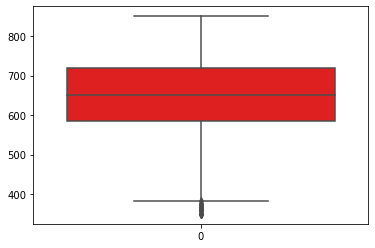

In [95]:
sns.boxplot(df["CreditScore"],color='red')

In [110]:
df["CreditScore"]=np.where(df["CreditScore"]<600,50,df["Age"])

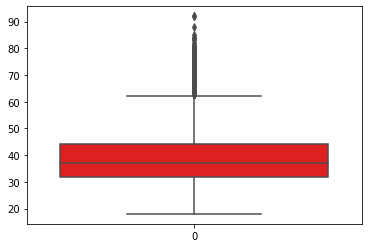

In [111]:
sns.boxplot(df["CreditScore"],color='red')

# 7. Check for Categorical columns and perform encoding

In [112]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,42,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,41,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,42,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,39,France,Female,39,1,0.00,2,0,0,93826.63,0


In [113]:
df["Gender"].replace({"Female":0,"Male":1},inplace = True)
df["Geography"].replace({"France":1,"Spain":2,"Germany":3},inplace = True)
df["Gender"].replace({"Female":0,"Male":1},inplace = True)
df["Geography"].replace({"France":1,"Spain":2,"Germany":3},inplace = True)

In [114]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,42,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,41,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,42,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,39,1,0,39,1,0.00,2,0,0,93826.63,0


# 8. Split the data into dependent and independent variables

In [115]:
y = df["Surname"]
x=df.drop(columns=["Surname"],axis=1)
x.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,42,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,41,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,42,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,39,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,43,2,0,43,2,125510.82,1,1,1,79084.10,0


# 9. Scale the independent variables

In [117]:
names=x.columns
names
X=scale(x)
X

array([[-1.73187761, -0.78321342,  0.29351742, ...,  0.97024255,
         0.02188649,  1.97716468],
       [-1.7315312 , -0.60653412,  0.19816383, ...,  0.97024255,
         0.21653375, -0.50577476],
       [-1.73118479, -0.99588476,  0.29351742, ..., -1.03067011,
         0.2406869 ,  1.97716468],
       ...,
       [ 1.73118479, -1.47928179, -0.27860412, ...,  0.97024255,
        -1.00864308,  1.97716468],
       [ 1.7315312 , -0.11935577,  0.29351742, ..., -1.03067011,
        -0.12523071,  1.97716468],
       [ 1.73187761, -0.87055909, -1.04143285, ..., -1.03067011,
        -1.07636976, -0.50577476]])

In [118]:
x = pd.DataFrame(X,columns = names )
x

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.731878,-0.783213,0.293517,-0.902587,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-1.731531,-0.606534,0.198164,0.301665,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.731185,-0.995885,0.293517,-0.902587,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,-1.730838,0.144767,0.007457,-0.902587,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,-1.730492,0.652659,0.388871,0.301665,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177652,0.007457,-0.902587,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775
9996,1.730838,-1.682806,-0.373958,-0.902587,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775
9997,1.731185,-1.479282,-0.278604,-0.902587,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165
9998,1.731531,-0.119356,0.293517,1.505917,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165


# 10. Split the data into training and testing

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7389,0.827747,-0.195066,-0.469311,0.301665,-1.095988,-0.469311,-0.004426,-1.225848,0.807737,0.646092,-1.030670,1.108382,-0.505775
9275,1.481077,0.810821,0.293517,1.505917,0.912419,0.293517,-1.387538,-0.012892,-0.911583,0.646092,0.970243,-0.747592,-0.505775
2995,-0.694379,-1.507642,-0.946079,-0.902587,-1.095988,-0.946079,-1.041760,0.575076,-0.911583,0.646092,-1.030670,1.487464,-0.505775
5316,0.109639,1.243462,0.102810,0.301665,0.912419,0.102810,-0.004426,0.467955,-0.911583,0.646092,-1.030670,1.278558,-0.505775
356,-1.608556,-1.100775,1.723821,0.301665,-1.095988,1.723821,1.032908,0.806010,0.807737,0.646092,0.970243,0.560069,-0.505775


In [122]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8000, 13), (8000,), (2000, 13), (2000,))